<a href="https://colab.research.google.com/github/mohitsshetty986/Mini-Projects/blob/master/NewsArticle_Scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This program scrapes and summarizes news articles**



---


### To get news articles **NLP is involved**. So we will **pip install** few libraries

In [1]:
pip install nltk

In [2]:
pip install newspaper3k

     |████████████████████████████████| 215kB 2.6MB/s 
     |████████████████████████████████| 7.4MB 4.9MB/s 
     |████████████████████████████████| 194kB 41.5MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3357 sha256=51a06b3a83709c8f2153d64dd029974a0b4a1440e9025c03181c8af3692d0d19
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=92068858b5506b50721a588bb425ed5af411bda395dba8353589ef54e0e901cd
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=0f9ad3715fc6cb922368d4e1fbbbb3bb552949dded7a523419d8274f025f0c0f
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e8



---


### First we are going to **get the URLs of articles** from The Washington Post website in the following steps.

In [3]:
import re, urllib.request
import numpy as np
from bs4 import BeautifulSoup

In [4]:
mainurl = 'http://www.washingtonpost.com/'

In [5]:

html = urllib.request.urlopen(mainurl).read()
soup = BeautifulSoup(html)
links = soup.findAll("a")
t = set([ link["href"] for link in links if link.has_attr('href')])




---


### Now we will get the **lists of URLs** by executing the below step after removing few unnecessary elements that the **Beautiful Soup** library might have caught while capturing the URLs in the previous step.

In [6]:
l=[]
for i in t:
  if i not in ['','#','./'] and i.find('www.washingtonpost.com')!=-1:
    l.append(i)

In [7]:
print(l)

['https://www.washingtonpost.com/graphics/2020/national/states-reopening-coronavirus-map/', 'https://www.washingtonpost.com/business/technology/', 'https://www.washingtonpost.com/people/lisa-bonos/', 'https://www.washingtonpost.com/world/asia_pacific/facial-recognition-china-animals-farms-agriculture/2020/08/23/9808c710-d6fb-11ea-b9b2-1ea733b97910_story.html', 'https://www.washingtonpost.com/subscribe/signin/?tid=nav_sign_in', 'https://www.washingtonpost.com/health/mental-health-support-for-students-at-college-counseling-centers/2020/08/21/9c0b1438-d275-11ea-9038-af089b63ac21_story.html', 'https://www.washingtonpost.com/outlook/2020/08/24/numbing-necrosis-mike-pompeos-leadership/', 'https://www.washingtonpost.com/people/ishaan-tharoor/', 'https://www.washingtonpost.com/national/', 'https://www.washingtonpost.com/people/joe-yonan/', 'https://www.washingtonpost.com/graphics/2020/politics/wisconsin-political-geography/', 'https://www.washingtonpost.com/lifestyle/interactive/2020/quarantin



---


### We will use **newspaper3k** to automatically extract structured information. We can get the title, author, published date, text passage of article and more interestingly we can get a short summary of the article as well.

Lets check it.

In [8]:
import nltk
from newspaper import Article

### We are going to **create a Dataframe** as it is more convinient to store the Article info in a tabular format

In [9]:
import pandas as pd

df = pd.DataFrame()



---


### The first step in processing natural language is to convert the original text into tokens. A token is a combination of continuous characters, with some meaning, which a computer finds it hard to understand.

### **So we will download the punkt resource which is a tockenizer.**

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True



---


### We will filter out the urls from the list we got in above steps i.e. the urls without an author or publishing date, which means these urls are not articles. 

### So we will extract the article authors and publish date from the urls using **.download()** - to first download the article, **.parse()** - to get a syntactic structure of the article downloaded and then finally use **.nlp()** to get the summary of the article.


In [11]:
list1=[]
list2=[]
for i in l:
  article = Article(i)
  try:
    article.download()
    article.parse()
    article.nlp()
    if len(article.authors)!=0 and article.publish_date is not None:
      list1.append(article.title)
      list2.append(i)
  except:
    pass
df['Article Topic']=list1
df['Article URL']=list2



---


### After filtering is done, the **dataframe** is created.

In [12]:
pd.set_option('max_colwidth', None)

df

,Article Topic,Article URL
0,Orwell’s nightmare? Facial recognition for animals promises a farmyard revolution,https://www.washingtonpost.com/world/asia_pacific/facial-recognition-china-animals-farms-agriculture/2020/08/23/9808c710-d6fb-11ea-b9b2-1ea733b97910_story.html
1,"As students head back to college, virtually or in person, counseling centers hope to provide mental health support",https://www.washingtonpost.com/health/mental-health-support-for-students-at-college-counseling-centers/2020/08/21/9c0b1438-d275-11ea-9038-af089b63ac21_story.html
2,The numbing necrosis of Mike Pompeo’s leadership,https://www.washingtonpost.com/outlook/2020/08/24/numbing-necrosis-mike-pompeos-leadership/
3,Travelers left behind nearly a million dollars at security checkpoints last year,https://www.washingtonpost.com/travel/2020/08/21/travelers-left-behind-nearly-million-dollars-security-checkpoints-last-year/
4,How ‘Love in the Time of Corona’ was filmed amid widespread production suspensions,https://www.washingtonpost.com/arts-entertainment/2020/08/22/love-time-corona-freeform-interview/
...,...,...
134,Live updates: Scientists express doubts about coronavirus treatment touted as breakthrough by Trump,https://www.washingtonpost.com/nation/2020/08/24/coronavirus-covid-live-updates-us/#link-Q5MKX2HWBRHS5OPYNG5F6OGDDA
135,"'Squeeze Me,' by Carl Hiaasen book review",https://www.washingtonpost.com/entertainment/books/squeeze-me-proves-that-the-trump-era-is-carl-hiaasens-moment/2020/08/21/51a40838-db07-11ea-b205-ff838e15a9a6_story.html
136,Biden and Harris push back on GOP attacks in their first joint TV interview,https://www.washingtonpost.com/politics/biden-and-harris-push-back-on-gop-attacks-in-their-first-joint-tv-interview/2020/08/23/da20f358-e550-11ea-97e0-94d2e46e759b_story.html
137,U.S. Speedskating found a coach was ‘threatening’ athletes — and let her keep coaching,https://www.washingtonpost.com/sports/2020/08/24/skeedskating-wilma-boomstra-bullying-allegations/


In [13]:
print("There are total",len(df.index),"articles available")

There are total 139 articles available




---


**We will get the list of all the articles we fetched from the Washington post site** 

### We have the article titles below

In [14]:
pd.set_option('display.max_rows', 500)
df['Article Topic']

0                                                     Orwell’s nightmare? Facial recognition for animals promises a farmyard revolution
1                    As students head back to college, virtually or in person, counseling centers hope to provide mental health support
2                                                                                      The numbing necrosis of Mike Pompeo’s leadership
3                                                      Travelers left behind nearly a million dollars at security checkpoints last year
4                                                    How ‘Love in the Time of Corona’ was filmed amid widespread production suspensions
5                                          Experts are cheering Michelle Obama’s openness about hot flashes. And they have some advice.
6                                                                                          Favorite cookbooks from our readers’ shelves
7                                   Live updates



---


### Input the **index from above table** to get the article

In [23]:
input1=int(input("Enter the option no. of the article you want to know about:"))

Enter the option no. of the article you want to know about:55




---


### We fetch the **url of the article index** you have selected from dataframe

In [24]:
article=Article(df['Article URL'].loc[input1])



---


### Do some NLP to get the information for the article

In [25]:
article.download()

article.parse()

article.nlp()



---


### Get the **title of article, author, published date**

In [26]:
print("Article Title:")
print(article.title+"\n")
print("Author of the article:")
print(article.authors,"\n")
print("published Date:",article.publish_date.date())

Article Title:
Healthy Fresh Meals competes in growing meal delivery market

Author of the article:
['Thomas Heath', 'Local Business Reporter', 'Columnist', 'Writing About Entrepreneurs', 'Companies In The Washington Metropolitan Area'] 

published Date: 2020-08-22




---


### Get a **summary** of the article

In [27]:
summary=article.summary
summary=summary.replace('AD',' ')
print(summary)


Greenbaum’s Healthy Fresh Meals delivers more than 4,000 servings every week to around 500 customers — including health-conscious gym rats and a sprinkling of professional athletes — throughout the Washington-Baltimore market.
She keeps headcount low: Healthy Fresh Meals staffs about 25 people, including four full-time employees, a dozen kitchen staffers and more than 10 drivers.
The food business has been part of her life since she was 18 and tending bar at Guapo’s Mexican-themed chain.
Launching Healthy Fresh Meals was an unglamorous grind.
Competition in the meal business is fierce, especially with the coronavirus pandemic that has closed restaurants and kept diners home.


In [28]:
print("Want to check the article from the Washington Post website? Here's the URL:\n")

article.url

Want to check the article from the Washington Post website? Here's the URL:



'https://www.washingtonpost.com/business/economy/entrepreneur-turns-healthy-lifestyle-into-booming-meal-delivery-business/2020/08/22/84b8e456-dd7c-11ea-b205-ff838e15a9a6_story.html'



---


### **Get the Main image of the article**

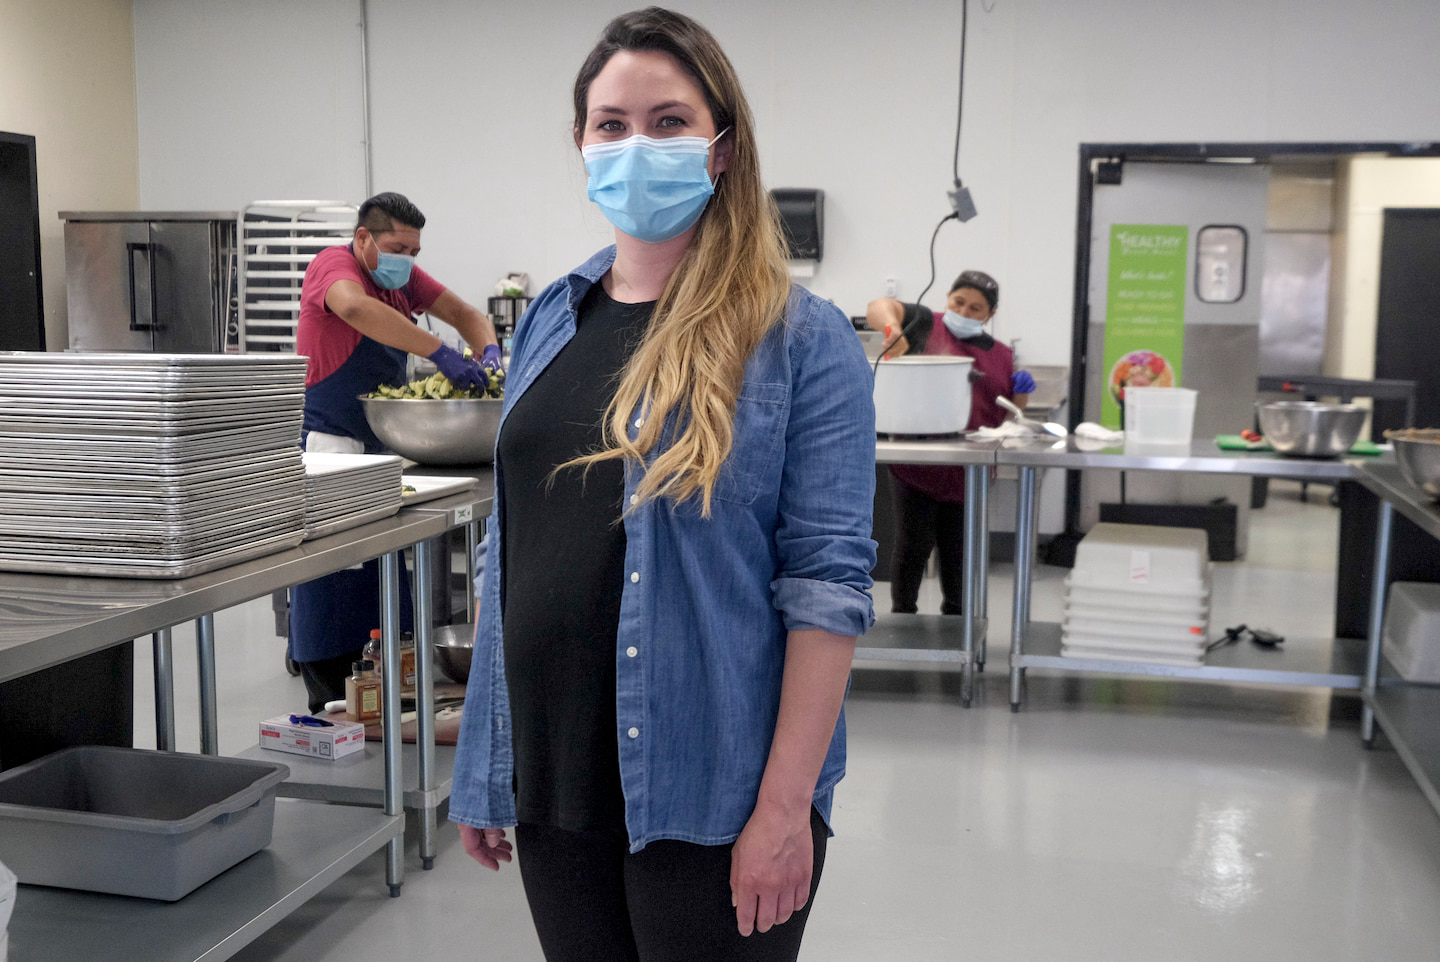

In [29]:
from google.colab.patches import cv2_imshow
import cv2

cap = cv2.VideoCapture(article.top_image)
ret, frame = cap.read()
cv2_imshow(frame)




---


### Get the **article paragraph**

In [30]:
text= article.text
text=text.replace('AD\n','')
print(text)

Shana Greenbaum, 34, was a searcher. The entrepreneur tried competitive ice skating, waiting on tables and hostessing, restaurant management, a bit of acting, and even bodybuilding before she founded her food delivery business four years ago.

Greenbaum’s Healthy Fresh Meals delivers more than 4,000 servings every week to around 500 customers — including health-conscious gym rats and a sprinkling of professional athletes — throughout the Washington-Baltimore market. The average meal is about $12.



The menu changes weekly. A recent week included several offerings, such as Thai coconut curry salmon for the average consumers or steak, sweet potato and broccoli for the athletic crowd.

“The food business suits me,” the businesswoman said. “We will see how this turns out after covid, but I own a building, I have a business and I am going to do something with it.”

Greenbaum’s staff cooks the meals and heat-seals them in recyclable trays designed to keep them fresh for a week with refriger